# Refinement Criteria

In [1]:
import numpy as np
import pyvista as pv
import pyvistaqt as pvqt
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
pd = pv.read('C:/Users/20192167/Documents/Boeken/BEP/SU2-master/SU2-master/QuickStart/flow.vtu')
pd

UnstructuredGrid (0x1e2dc646ac0)
  N Cells:	10216
  N Points:	5233
  X Bounds:	-2.000e+01, 2.000e+01
  Y Bounds:	-1.996e+01, 1.996e+01
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	7

In [3]:
temperature = pd['Temperature']
temperature

array([293.03778, 290.83038, 289.12076, ..., 273.13605, 273.0605 ,
       273.11478], dtype=float32)

In [4]:
Centers = []
cellsC = pd.cells

while True:
    if cellsC[0]==3:
        a = cellsC[1]
        b = cellsC[2]
        c = cellsC[3]
        
        C = (temperature[a]+temperature[b]+temperature[c])/3
        Centers.append(C)
        cellsC = cellsC[4:]
        
    elif cellsC[0]==4:
        a = cellsC[1]
        b = cellsC[2]
        c = cellsC[3]
        d = cellsC[4]
        
        C = (temperature[a]+temperature[b]+temperature[c]+temperature[d])/4
        Centers.append(C)
        cellsC = cellsC[5:]
    
    if len(cellsC) == 0:
        break
        
Centers

[251.75836181640625,
 259.2937825520833,
 277.1942138671875,
 252.0662841796875,
 253.13798014322916,
 286.6274007161458,
 267.5084228515625,
 249.49454752604166,
 299.5664876302083,
 267.0081787109375,
 225.3115234375,
 280.5158284505208,
 226.3529256184896,
 259.0219319661458,
 305.0590006510417,
 286.1806233723958,
 305.0369059244792,
 249.23616536458334,
 279.1359049479167,
 270.05224609375,
 284.36083984375,
 273.3275960286458,
 229.97125244140625,
 267.7151285807292,
 243.40826416015625,
 279.3916422526042,
 290.71754964192706,
 271.5277099609375,
 225.4369913736979,
 273.2127278645833,
 274.4410400390625,
 269.5954182942708,
 251.7281290690104,
 276.5891927083333,
 274.6990966796875,
 271.7178955078125,
 291.69952392578125,
 275.55084228515625,
 261.4295247395833,
 277.3067220052083,
 286.9405924479167,
 266.29868570963544,
 292.1177164713542,
 287.52392578125,
 262.60101318359375,
 282.6846110026042,
 260.1676025390625,
 267.8058675130208,
 271.8535970052083,
 268.9582112630208

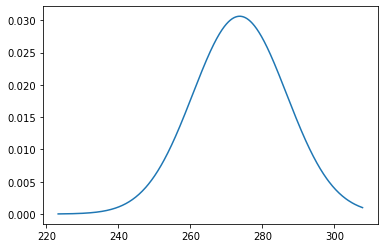

In [5]:
centersImage = Centers.copy()
centersImage.sort()

# Calculating mean and standard deviation
mean = np.mean(centersImage)
std = np.std(centersImage)
plt.plot(centersImage, norm.pdf(centersImage, mean, std))
plt.show()

### Refinement Criteria

**Min or Max value**

In [7]:
#--------------------------#
#-----Min or Max value-----#
#--------------------------#

Index = []

for x in range(0, len(Centers)):
    if Centers[x] <= 250:
        Index.append(x)
        
Index

[7,
 10,
 12,
 17,
 22,
 24,
 28,
 56,
 59,
 69,
 97,
 111,
 112,
 113,
 114,
 117,
 124,
 125,
 129,
 134,
 135,
 136,
 140,
 141,
 142,
 144,
 145,
 146,
 147,
 148,
 149,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 177,
 189,
 192,
 193,
 195,
 421,
 427,
 433,
 506,
 509,
 524,
 525,
 530,
 531,
 549,
 552,
 553,
 554,
 610,
 612,
 613,
 618,
 619,
 625,
 657,
 666,
 679,
 688,
 691,
 700,
 701,
 709,
 710,
 712,
 713,
 716,
 717,
 718,
 719,
 726,
 727,
 731,
 736,
 744,
 745,
 748,
 749,
 750,
 752,
 753,
 754,
 755,
 756,
 757,
 758,
 759,
 760,
 761,
 762,
 763,
 764,
 765,
 766,
 767,
 768,
 769,
 772,
 773,
 796,
 808,
 809,
 812,
 813,
 816,
 817,
 818,
 819,
 820,
 821,
 822,
 823,
 824,
 825,
 826,
 827,
 830,
 831,
 834,
 835,
 847,
 850,
 851,
 857,
 858,
 859,
 860,
 861,
 866,
 867,
 872,
 873,
 890,
 891,
 906,
 908,
 916,
 917,
 961,
 964,
 965,
 967,
 968,
 969,
 974,
 975,
 976,
 977,
 988,
 989,
 990,
 991,
 992,
 993,
 994,
 995,
 1002,
 1003,
 1040,
 

**Min or Max percentage**

In [8]:
#-------------------------------#
#-----Confidence Interval-------#
#-------------------------------#

Index = []

margin = np.percentile(Centers, 90)

for x in range(0, len(Centers)):
    if Centers[x] >= margin:
        Index.append(x)
        
Index

[8,
 14,
 16,
 26,
 36,
 42,
 43,
 54,
 77,
 90,
 91,
 101,
 102,
 103,
 104,
 107,
 108,
 138,
 139,
 162,
 165,
 179,
 181,
 182,
 186,
 187,
 188,
 198,
 201,
 399,
 403,
 405,
 407,
 409,
 411,
 413,
 415,
 417,
 419,
 423,
 437,
 443,
 445,
 453,
 455,
 457,
 461,
 465,
 485,
 487,
 491,
 493,
 513,
 514,
 515,
 520,
 521,
 527,
 534,
 540,
 564,
 565,
 571,
 604,
 640,
 641,
 643,
 652,
 669,
 672,
 674,
 675,
 681,
 696,
 697,
 698,
 702,
 703,
 838,
 848,
 849,
 863,
 864,
 865,
 868,
 869,
 870,
 871,
 876,
 878,
 879,
 882,
 883,
 888,
 889,
 894,
 895,
 914,
 932,
 933,
 959,
 982,
 983,
 1001,
 1006,
 1008,
 1009,
 1014,
 1016,
 1018,
 1020,
 1021,
 1023,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1032,
 1033,
 1036,
 1037,
 1038,
 1052,
 1053,
 1089,
 1135,
 1136,
 1137,
 1138,
 1139,
 1143,
 1158,
 1159,
 1160,
 1161,
 1164,
 1165,
 1176,
 1266,
 1267,
 1284,
 1292,
 1293,
 1296,
 1297,
 1308,
 1309,
 1314,
 1315,
 1316,
 1317,
 1318,
 1319,
 1320,
 1321,
 1324,
 1325,
 1

**Gradient**

In [1]:
temperature = pd['Temperature']
np.gradient(temperature, axis=None, edge_order=1)


NameError: name 'pd' is not defined